# 전처리 전

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np

1. **recommendationid**: 추천 ID - 리뷰를 고유하게 식별하는 ID입니다.
2. **language**: 언어 - 사용자가 리뷰를 작성한 언어입니다.
3. **review**: 리뷰 - 사용자가 작성한 게임 리뷰 내용입니다.
4. **timestamp_created**: 작성 시간 - 리뷰가 처음 작성된 타임스탬프입니다.
5. **timestamp_updated**: 수정 시간 - 리뷰가 마지막으로 수정된 타임스탬프입니다.
6. **voted_up**: 추천 여부 - 사용자가 게임을 추천했는지 여부(true/false)입니다.
7. **votes_up**: 유용한 투표 수 - 리뷰가 받은 긍정적인(유용한) 투표 수입니다.
8. **votes_funny**: 재미있는 투표 수 - 리뷰가 받은 재미있다는 투표 수입니다.
9. **weighted_vote_score**: 가중치가 적용된 투표 점수 - 리뷰의 투표 점수를 가중치로 계산한 값입니다.
10. **comment_count**: 댓글 수 - 리뷰에 달린 댓글의 총 개수입니다.
11. **steam_purchase**: Steam 구매 여부 - 리뷰를 작성한 게임이 Steam에서 구매한 것인지 여부입니다(true/false).
12. **received_for_free**: 무료로 받았는지 여부 - 사용자가 게임을 무료로 받았는지 여부입니다(true/false).
13. **written_during_early_access**: 얼리 액세스 중 작성 여부 - 리뷰가 게임의 얼리 액세스 기간 동안 작성되었는지 여부입니다(true/false).
14. **primarily_steam_deck**: Steam Deck에서 주로 사용 여부 - 사용자가 Steam Deck에서 게임을 주로 플레이했는지 여부입니다(true/false).
15. **steamid**: Steam ID - 리뷰를 작성한 사용자의 고유 Steam ID입니다.
16. **num_games_owned**: 소유한 게임 수 - 사용자가 소유한 Steam 게임의 총 개수입니다.
17. **num_reviews**: 작성한 리뷰 수 - 사용자가 작성한 리뷰의 총 개수입니다.
18. **playtime_forever**: 총 플레이 시간 - 사용자가 게임을 지금까지 플레이한 총 시간(분 단위)입니다.
19. **playtime_last_two_weeks**: 최근 2주간 플레이 시간 - 사용자가 최근 2주 동안 게임을 플레이한 시간(분 단위)입니다.
20. **playtime_at_review**: 리뷰 당시 플레이 시간 - 사용자가 리뷰를 작성할 때까지 게임을 플레이한 총 시간(분 단위)입니다.
21. **last_played**: 마지막 플레이 시간 - 사용자가 게임을 마지막으로 플레이한 타임스탬프입니다.
22. **deck_playtime_at_review**: 리뷰 당시 Steam Deck 플레이 시간 - 리뷰 작성 시 Steam Deck에서 게임을 플레이한 총 시간(분 단위)입니다.
23. **timestamp_dev_responded**: 개발자 응답 시간 - 리뷰에 대해 개발자가 응답한 타임스탬프입니다.
24. **developer_response**: 개발자 응답 - 리뷰에 대한 개발자의 응답 내용입니다.

In [23]:
all_reviews = pd.read_csv('./output.csv', low_memory=False)

all_reviews = all_reviews.drop(['language', 'timestamp_dev_responded', 'developer_response'], axis=1)

In [24]:
all_reviews.head()

,recommendationid,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,...,written_during_early_access,primarily_steam_deck,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,deck_playtime_at_review
0,178539876,좋아요 ㅎ,1730952523,1730952523,True,0,0,0.00000,0,True,...,False,False,76561198410384020,23,5,243,243,243.0,1730820014,NaN
1,177253991,개같은게임 죽어,1729234786,1729234786,False,0,0,0.00000,0,True,...,False,False,76561198181791862,0,3,30,0,27.0,1729234850,NaN
2,177086070,같이하니 확실이 재미있음 다만 둘이하라고 있는게임인데 온라인 멀티를 공식적으로 지...,1728983669,1728983669,True,1,0,0.52381,0,False,...,False,False,76561198855598569,0,7,388,0,388.0,1726330445,NaN
3,176963568,굿굿 재밌음 굿 굿 좀 어려움 근ㄷ ㅔ 굿,1728819540,1728819540,True,0,0,0.00000,0,True,...,False,False,76561199084662054,0,13,188,0,188.0,1727102252,NaN
4,175808328,리모트 플레이 개좆병신겜,1727355610,1727355610,False,0,0,0.00000,0,True,...,False,False,76561198151511186,207,3,28,0,20.0,1727355831,NaN


In [28]:
all_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68474 entries, 0 to 68473
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   recommendationid             68474 non-null  int64  
 1   review                       68314 non-null  object 
 2   timestamp_created            68474 non-null  int64  
 3   timestamp_updated            68474 non-null  int64  
 4   voted_up                     68474 non-null  bool   
 5   votes_up                     68474 non-null  int64  
 6   votes_funny                  68474 non-null  int64  
 7   weighted_vote_score          68474 non-null  float64
 8   comment_count                68474 non-null  int64  
 9   steam_purchase               68474 non-null  bool   
 10  received_for_free            68474 non-null  bool   
 11  written_during_early_access  68474 non-null  bool   
 12  primarily_steam_deck         68474 non-null  bool   
 13  steamid         

In [27]:
all_reviews['deck_playtime_at_review'].isna().sum()

68346

In [29]:
all_reviews['deck_playtime_at_review'].fillna(0, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_23920\1603235990.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_reviews['deck_playtime_at_review'].fillna(0, inplace=True)


In [30]:
all_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68474 entries, 0 to 68473
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   recommendationid             68474 non-null  int64  
 1   review                       68314 non-null  object 
 2   timestamp_created            68474 non-null  int64  
 3   timestamp_updated            68474 non-null  int64  
 4   voted_up                     68474 non-null  bool   
 5   votes_up                     68474 non-null  int64  
 6   votes_funny                  68474 non-null  int64  
 7   weighted_vote_score          68474 non-null  float64
 8   comment_count                68474 non-null  int64  
 9   steam_purchase               68474 non-null  bool   
 10  received_for_free            68474 non-null  bool   
 11  written_during_early_access  68474 non-null  bool   
 12  primarily_steam_deck         68474 non-null  bool   
 13  steamid         

In [31]:
numeric_values = [
    'timestamp_created',       # 리뷰 작성 시간 (타임스탬프)
    'timestamp_updated',       # 리뷰 수정 시간 (타임스탬프)
    'votes_up',                # 유용한 투표 수
    'votes_funny',             # 재미있는 투표 수
    'weighted_vote_score',     # 가중치가 적용된 투표 점수
    'comment_count',           # 댓글 수
    'num_games_owned',         # 소유한 게임 수
    'num_reviews',             # 작성한 리뷰 수
    'playtime_forever',        # 총 플레이 시간 (분)
    'playtime_last_two_weeks', # 최근 2주간 플레이 시간 (분)
    'playtime_at_review',      # 리뷰 당시 플레이 시간 (분)
    'last_played',             # 마지막 플레이 시간 (타임스탬프)
    'deck_playtime_at_review'  # 리뷰 당시 Steam Deck 플레이 시간 (분)
]

In [32]:
categorical_values = [
    'recommendationid',              # 추천 ID
    'review',                        # 리뷰 내용
    'voted_up',                      # 추천 여부 (True/False)
    'steam_purchase',                # Steam 구매 여부 (True/False)
    'received_for_free',             # 무료로 받았는지 여부 (True/False)
    'written_during_early_access',   # 얼리 액세스 중 작성 여부 (True/False)
    'primarily_steam_deck',          # Steam Deck에서 주로 사용 여부 (True/False)
    'steamid'                        # 사용자 Steam ID
]

In [33]:
len(numeric_values+categorical_values)

21

In [34]:
boolean_columns = [
    'voted_up',
    'steam_purchase',
    'received_for_free',
    'written_during_early_access',
    'primarily_steam_deck'
]

# True/False 값을 1/0으로 변환
for col in boolean_columns:
    if col in categorical_values:  # Ensure the column is in the categorical values list
        all_reviews[col] = all_reviews[col].astype(int)

In [35]:
# 변환된 데이터 확인
for index in boolean_columns:
    print(all_reviews[index].value_counts())

voted_up
1    52849
0    15625
Name: count, dtype: int64
steam_purchase
1    42389
0    26085
Name: count, dtype: int64
received_for_free
0    66287
1     2187
Name: count, dtype: int64
written_during_early_access
0    53947
1    14527
Name: count, dtype: int64
primarily_steam_deck
0    68438
1       36
Name: count, dtype: int64


In [36]:
all_reviews[numeric_values].describe()

,timestamp_created,timestamp_updated,votes_up,votes_funny,weighted_vote_score,comment_count,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played,deck_playtime_at_review
count,6.847400e+04,6.847400e+04,68474.000000,6.847400e+04,68474.000000,68474.000000,68474.000000,68474.000000,6.847400e+04,68474.000000,68464.000000,6.847400e+04,68474.000000
mean,1.629685e+09,1.639492e+09,1.506061,6.272461e+04,0.159522,0.082571,43.120863,13.179937,3.132030e+04,167.552545,14424.959877,1.690132e+09,0.904811
std,6.598737e+07,6.443538e+07,13.249521,1.641334e+07,0.245112,1.217627,211.458011,40.893924,6.286621e+04,685.782290,36226.478685,4.936400e+07,58.392967
min,1.383964e+09,1.383967e+09,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,1.000000,1.393277e+09,0.000000
25%,1.580738e+09,1.592737e+09,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.920250e+03,0.000000,643.000000,1.665663e+09,0.000000
50%,1.627735e+09,1.641625e+09,0.000000,0.000000e+00,0.000000,0.000000,0.000000,4.000000,7.654000e+03,0.000000,2509.000000,1.710658e+09,0.000000
75%,1.687958e+09,1.695740e+09,0.000000,0.000000e+00,0.476190,0.000000,27.000000,12.000000,3.106750e+04,0.000000,10952.250000,1.728498e+09,0.000000
max,1.731736e+09,1.731754e+09,1194.000000,4.294967e+09,0.985281,190.000000,12892.000000,4438.000000,1.341278e+06,19709.000000,926330.000000,1.731757e+09,11617.000000


In [37]:
def eda_combined_numeric(data, numeric_columns, output_file="combined_numeric.png"):
    print("연속형 변수(Numeric Values)에 대한 기술 통계:")
    print(data[numeric_columns].describe())
    
    # 행과 열의 개수 계산 (최대 4열씩 배열)
    num_cols = 4
    num_rows = math.ceil(len(numeric_columns) / num_cols)
    
    # 서브플롯 크기 설정
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
    axes = axes.flatten()  # 서브플롯 배열을 1D로 변환
    
    # 각 열에 대해 히스토그램 그리기
    for idx, col in enumerate(numeric_columns):
        ax = axes[idx]
        ax.hist(data[col].dropna(), bins=30, edgecolor='k')
        ax.set_title(f'Histogram of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
    
    # 빈 서브플롯 제거
    for idx in range(len(numeric_columns), len(axes)):
        fig.delaxes(axes[idx])
    
    # 그래프 간격 조정
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # 수직 간격(hspace)과 수평 간격(wspace) 조정
    
    # 전체 플롯 저장
    plt.show()
    plt.savefig(output_file)
    plt.close()
    print(f"Combined numeric plot saved as {output_file}")

In [38]:
def eda_combined_categorical(data, categorical_columns, output_file="combined_categorical.png"):
    print("\n이산형 변수(Categorical Values)에 대한 고유 값 수:")
    
    # 행과 열의 개수 계산 (최대 4열씩 배열)
    num_cols = 4
    num_rows = math.ceil(len(categorical_columns) / num_cols)
    
    # 서브플롯 크기 설정
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
    axes = axes.flatten()  # 서브플롯 배열을 1D로 변환
    
    for idx, col in enumerate(categorical_columns):
        print(f"{col}: {data[col].nunique()} unique values")
        ax = axes[idx]
        if data[col].nunique() < 20:  # 유일값이 적은 경우만 그래프 생성
            data[col].value_counts().plot(kind='bar', ax=ax)
            ax.set_title(f'Bar Plot of {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')
        else:
            ax.axis('off')  # 유일값이 많으면 비워둠
    
    # 빈 서브플롯 제거
    for idx in range(len(categorical_columns), len(axes)):
        fig.delaxes(axes[idx])
    
    # 그래프 간격 조정
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # 수직 간격(hspace)과 수평 간격(wspace) 조정
    
    # 전체 플롯 저장
    plt.show()
    plt.savefig(output_file)
    plt.close()
    print(f"Combined categorical plot saved as {output_file}")

연속형 변수(Numeric Values)에 대한 기술 통계:
       timestamp_created  timestamp_updated      votes_up   votes_funny  \
count       6.847400e+04       6.847400e+04  68474.000000  6.847400e+04   
mean        1.629685e+09       1.639492e+09      1.506061  6.272461e+04   
std         6.598737e+07       6.443538e+07     13.249521  1.641334e+07   
min         1.383964e+09       1.383967e+09      0.000000  0.000000e+00   
25%         1.580738e+09       1.592737e+09      0.000000  0.000000e+00   
50%         1.627735e+09       1.641625e+09      0.000000  0.000000e+00   
75%         1.687958e+09       1.695740e+09      0.000000  0.000000e+00   
max         1.731736e+09       1.731754e+09   1194.000000  4.294967e+09   

       weighted_vote_score  comment_count  num_games_owned   num_reviews  \
count         68474.000000   68474.000000     68474.000000  68474.000000   
mean              0.159522       0.082571        43.120863     13.179937   
std               0.245112       1.217627       211.458011    

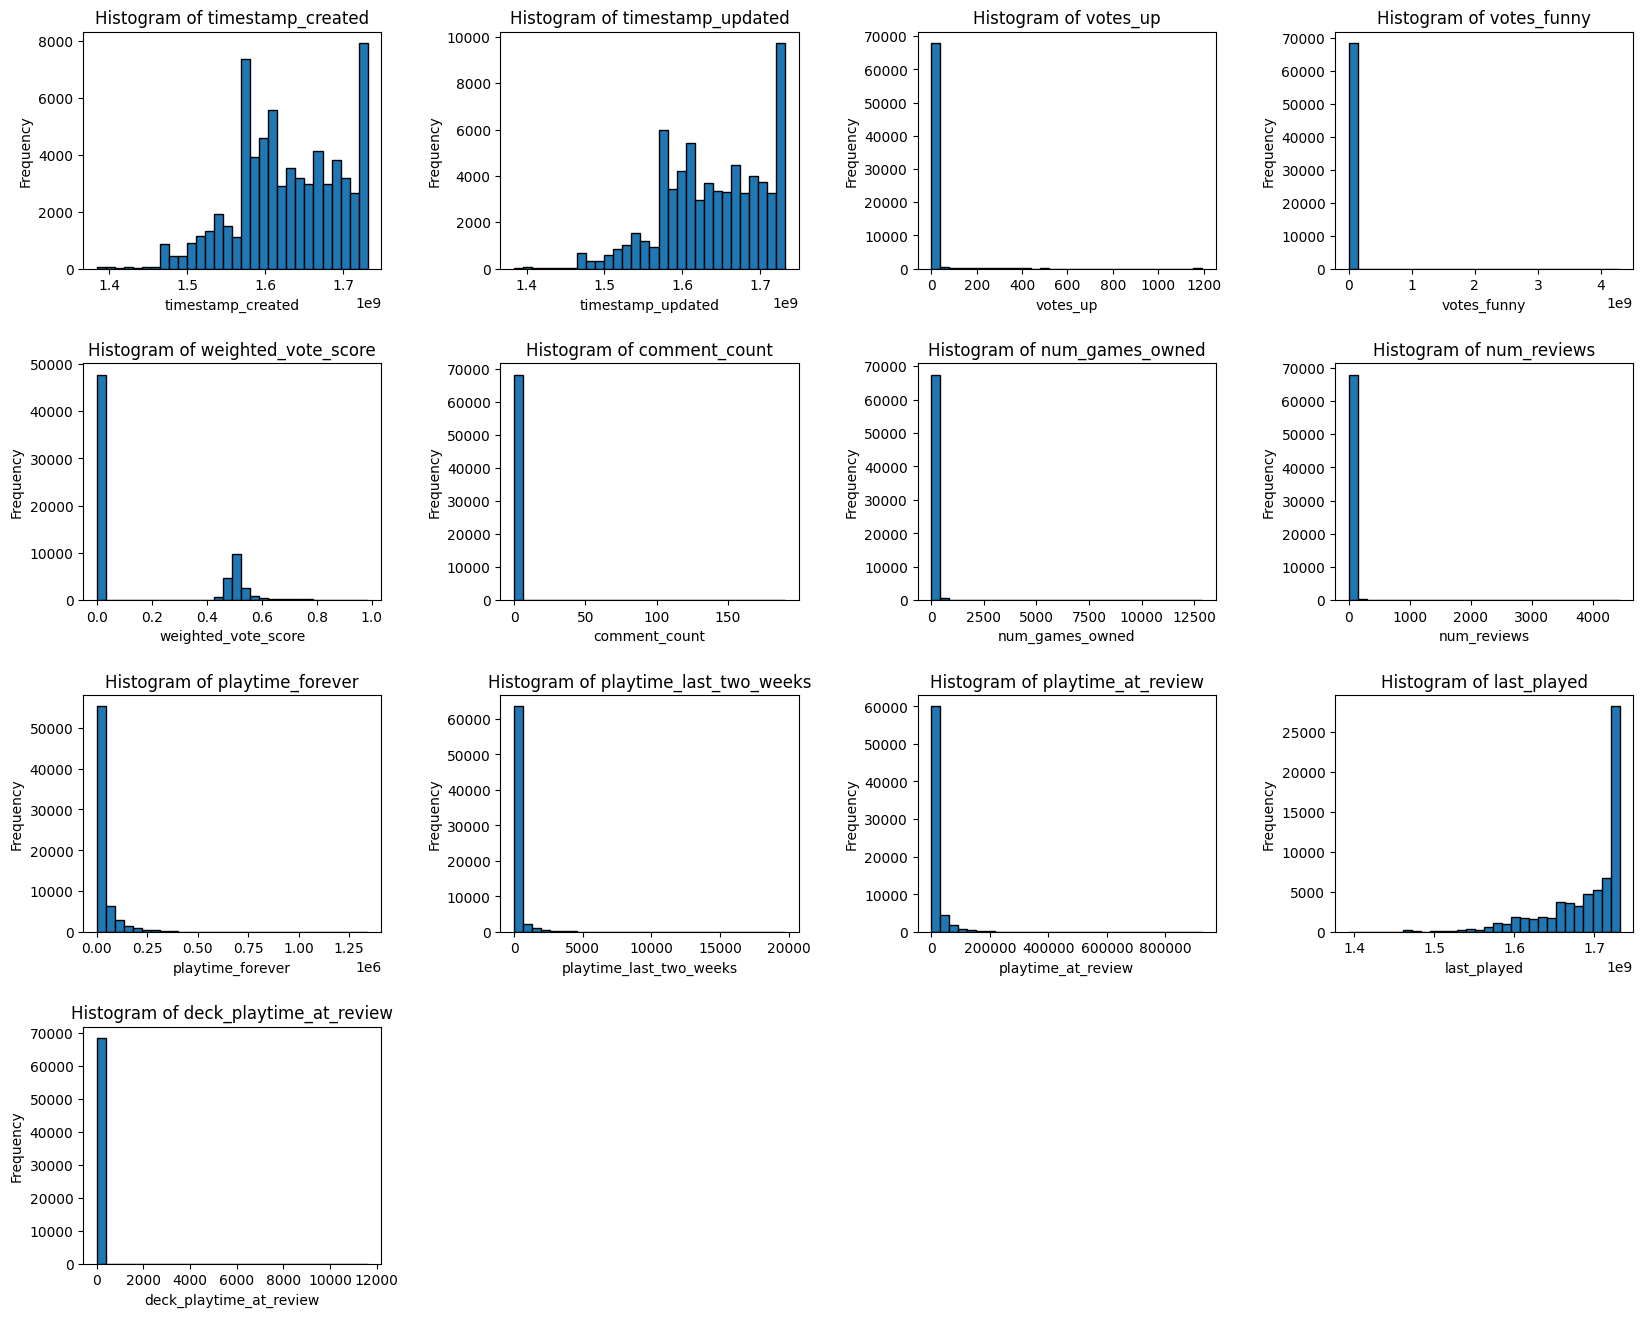

Combined numeric plot saved as numeric_combined_plot.png

이산형 변수(Categorical Values)에 대한 고유 값 수:
voted_up: 2 unique values
steam_purchase: 2 unique values
received_for_free: 2 unique values
written_during_early_access: 2 unique values
primarily_steam_deck: 2 unique values
steamid: 63278 unique values


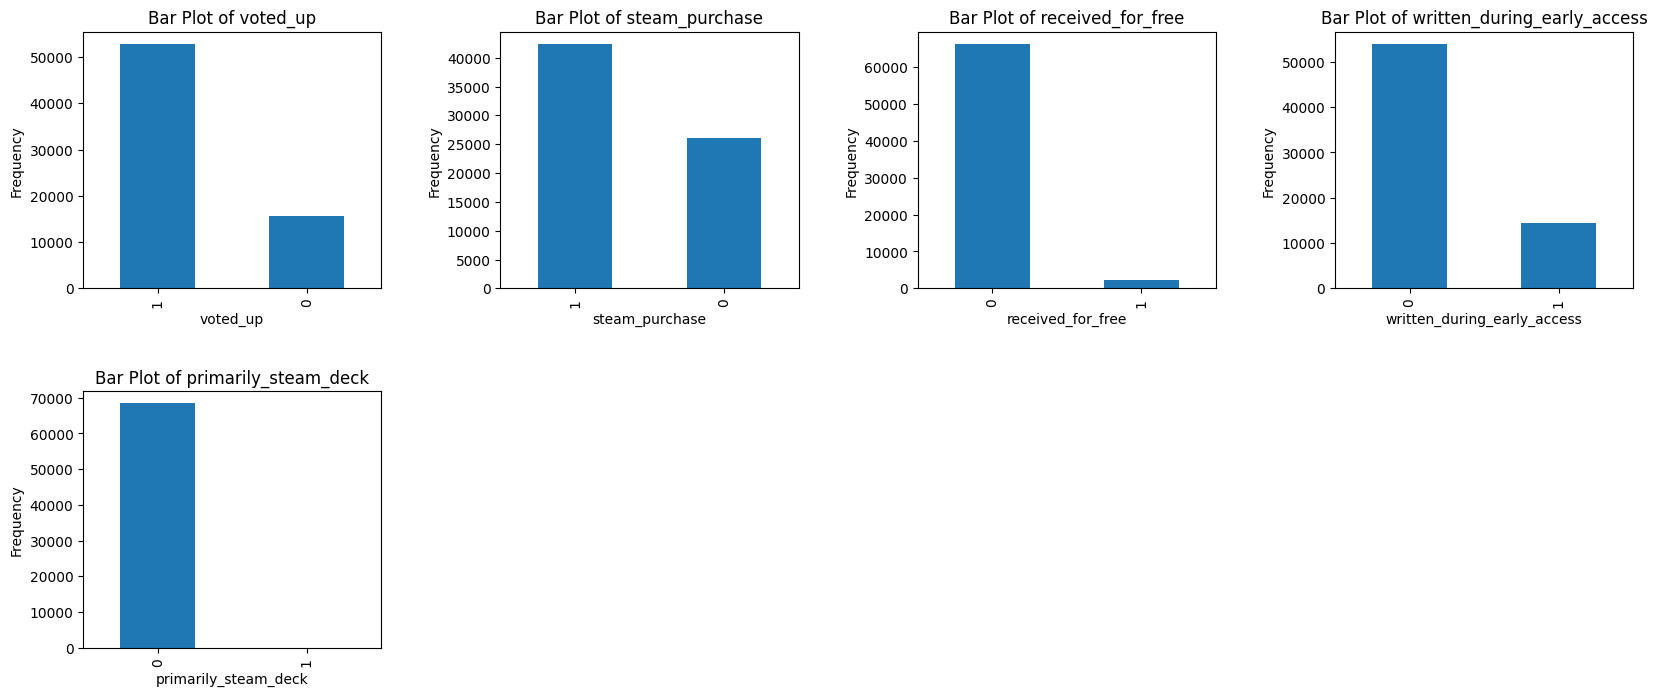

Combined categorical plot saved as categorical_combined_plot.png


In [39]:
eda_combined_numeric(all_reviews, numeric_values, output_file="numeric_combined_plot.png")
eda_combined_categorical(all_reviews, [i for i in categorical_values if i not in ['recommendationid', 'review']], output_file="categorical_combined_plot.png")

In [40]:
all_reviews['primarily_steam_deck'].value_counts()

primarily_steam_deck
0    68438
1       36
Name: count, dtype: int64

### 1. **연속형 변수 (Numeric Values)**
- **주요 특징**:
  - `timestamp_created`와 `timestamp_updated`는 유사한 분포를 가집니다.
  - `votes_up`와 `votes_funny`의 분포는 매우 치우쳐 있으며 대부분 값이 0입니다.
  - `weighted_vote_score`와 `comment_count`는 대부분 값이 작습니다.
  - `playtime_forever`와 `playtime_at_review`는 평균보다 최대값이 매우 큰 편입니다(긴 꼬리 분포).

In [41]:
def analyze_correlations(data, numeric_values, categorical_values, target_column):
    # 1. 연속형 변수(numeric_values)와의 상관관계 분석
    print("\n[Numeric Variables Correlation]")
    numeric_corr = data[[target_column] + numeric_values].corr(method='pearson')
    print(numeric_corr[target_column].sort_values(ascending=False))  # target_column과의 상관관계 출력

    # 상관관계 히트맵 그리기
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_corr, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

    # 2. 범주형 변수(categorical_values)와의 상관관계 분석
    print("\n[Categorical Variables Correlation]")
    for col in categorical_values:
        if col != target_column:  # target_column 제외
            # 카이제곱 검정을 위해 교차표 생성
            contingency_table = pd.crosstab(data[col], data[target_column])
            chi2, p, dof, _ = chi2_contingency(contingency_table)
            print(f"{col} - Chi2: {chi2:.2f}, p-value: {p:.4f}")
    
    # 3. 이진 변수(범주형 변수 중 2개의 값만 가지는 경우) 상관관계 분석
    print("\n[Binary Categorical Variables Pearson Correlation]")
    for col in categorical_values:
        if data[col].dtype == 'bool' or data[col].nunique() == 2:  # 이진 변수만 처리
            data[col] = data[col].astype(int)  # True/False를 1/0으로 변환
            corr = np.corrcoef(data[target_column], data[col])[0, 1]
            print(f"{col} - Pearson Correlation with {target_column}: {corr:.2f}")



[Numeric Variables Correlation]
voted_up                   1.000000
last_played                0.061551
timestamp_created          0.013711
deck_playtime_at_review    0.005998
playtime_last_two_weeks    0.003666
votes_funny                0.002078
comment_count             -0.019772
num_games_owned           -0.019859
num_reviews               -0.025185
votes_up                  -0.039307
timestamp_updated         -0.039764
playtime_forever          -0.041697
playtime_at_review        -0.084638
weighted_vote_score       -0.161145
Name: voted_up, dtype: float64


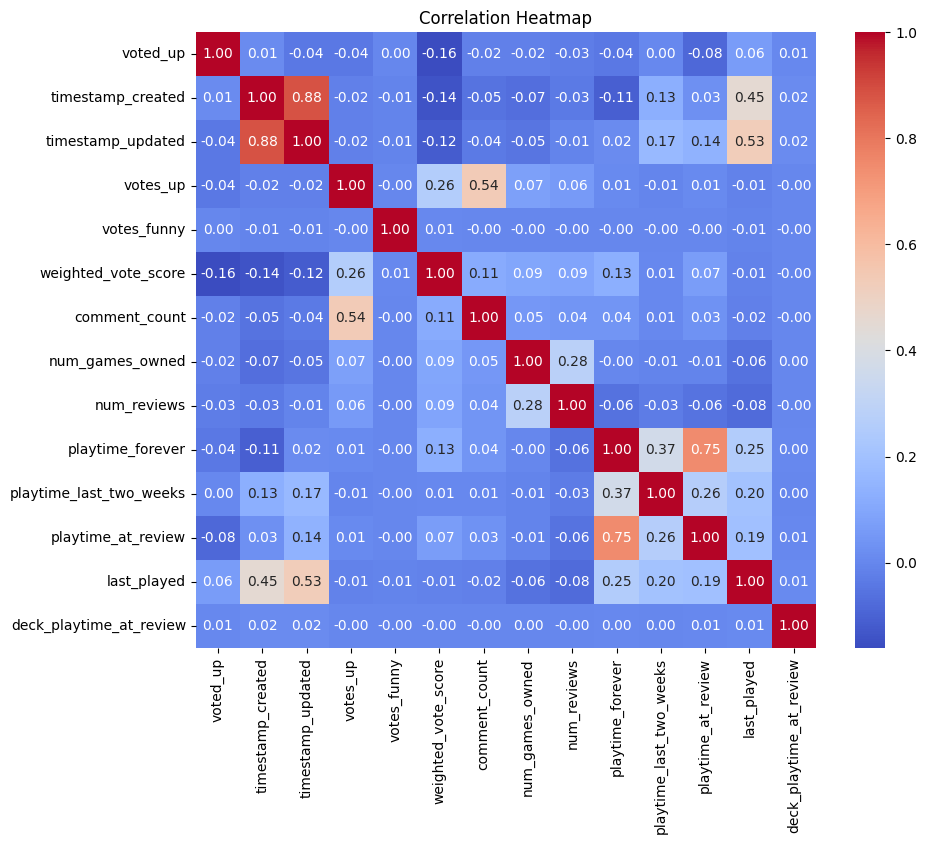


[Categorical Variables Correlation]
steam_purchase - Chi2: 419.45, p-value: 0.0000
received_for_free - Chi2: 58.39, p-value: 0.0000
written_during_early_access - Chi2: 1377.64, p-value: 0.0000
primarily_steam_deck - Chi2: 0.26, p-value: 0.6097

[Binary Categorical Variables Pearson Correlation]
steam_purchase - Pearson Correlation with voted_up: 0.08
received_for_free - Pearson Correlation with voted_up: 0.03
written_during_early_access - Pearson Correlation with voted_up: 0.14
primarily_steam_deck - Pearson Correlation with voted_up: -0.00


In [42]:
target_column = 'voted_up'

# 분석 실행
analyze_correlations(all_reviews, numeric_values, [i for i in categorical_values if i not in ['voted_up', 'recommendationid', 'steamid', 'review']], target_column)

# 언더 샘플링 진행

In [47]:
print(all_reviews['voted_up'].value_counts())

# voted_up == 1과 voted_up == 0 데이터 분리
positive_reviews = all_reviews[all_reviews['voted_up'] == 1]
negative_reviews = all_reviews[all_reviews['voted_up'] == 0]

# voted_up == 1 데이터를 weighted_vote_score 기준으로 정렬 (유용한 리뷰 우선)
positive_reviews = positive_reviews.sort_values(by='weighted_vote_score', ascending=False)

# 언더샘플링: votes_up이 높은 리뷰를 우선적으로 선택
positive_reviews_under = positive_reviews.head(len(negative_reviews))

# 언더샘플링된 데이터셋 결합
balanced_df = pd.concat([positive_reviews_under, negative_reviews])

# 데이터 섞기
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# 결과 확인
print("Balanced distribution of voted_up:")
print(balanced_df['voted_up'].value_counts())

# 확인: weighted_vote_score 기준으로 언더샘플링된 긍정 리뷰 확인
print("Top weighted_vote_score in positive reviews after undersampling:")
print(balanced_df[balanced_df['voted_up'] == 1].sort_values(by='weighted_vote_score', ascending=False).head())

voted_up
1    52849
0    15625
Name: count, dtype: int64
Balanced distribution of voted_up:
voted_up
0    15625
1    15625
Name: count, dtype: int64
Top weighted_vote_score in positive reviews after undersampling:
       recommendationid                                             review  \
13145          46022261                                             콜라보 맛집   
23247         128801924                        현실보다 나를 찾아주는 사람들이 많은 행복한 게임   
20414          93222166  <움직임으로 생존자 국적 구별하는 법>\n\n걸어다닌다 : 일본\n뛰어다닌다 : 한...   
7390           55440806  [h3]본 리뷰는 2019년 10월에 작성된 리뷰입니다. 지금과 다를 수 있어요[/...   
15353         127813328  프로젝트 좀보이드는 다른 생존 게임들과는 다르게 플레이어가 죽는 것을 목적으로 두고...   

       timestamp_created  timestamp_updated  voted_up  votes_up  votes_funny  \
13145         1542833776         1609070804         1       730           38   
23247         1671379693         1671379693         1       275          246   
20414         1622889056         1622889056         1       310          301 

In [ ]:
# balanced_df.to_csv('./steam_reviews_output_sortby_weighted_vote_score.csv', index=False)
# balanced_df.to_parquet("output_sortby_weighted_vote_score.parquet", engine="pyarrow", index=False)

In [50]:
print(all_reviews['voted_up'].value_counts())

# voted_up == 1과 voted_up == 0 데이터 분리
positive_reviews = all_reviews[all_reviews['voted_up'] == 1]
negative_reviews = all_reviews[all_reviews['voted_up'] == 0]

# voted_up == 1 데이터를 votes_up 기준으로 정렬 (유용한 리뷰 우선)
positive_reviews = positive_reviews.sort_values(by='votes_up', ascending=False)

# 언더샘플링: votes_up이 높은 리뷰를 우선적으로 선택
positive_reviews_under = positive_reviews.head(len(negative_reviews))

# 언더샘플링된 데이터셋 결합
balanced_df = pd.concat([positive_reviews_under, negative_reviews])

# 데이터 섞기
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# 결과 확인
print("Balanced distribution of voted_up:")
print(balanced_df['voted_up'].value_counts())

# 확인: votes_up 기준으로 언더샘플링된 긍정 리뷰 확인
print("Top votes_up in positive reviews after undersampling:")
print(balanced_df[balanced_df['voted_up'] == 1].sort_values(by='votes_up', ascending=False).head())

voted_up
1    52849
0    15625
Name: count, dtype: int64
Balanced distribution of voted_up:
voted_up
0    15625
1    15625
Name: count, dtype: int64
Top votes_up in positive reviews after undersampling:
       recommendationid                                             review  \
13145         143829283  진짜 어떻게 보면 개쩌는거 아니냐?\n\n애내가 3D 포르노의 한 획을 그었다. 농...   
23247          24878340                                             환불이 잘됨   
20414          24855551  요즘 분노 조절 장애떔에 고민인데....\n\n이 게임을 하고 해탈을 했다 도저히 ...   
7390           46022261                                             콜라보 맛집   
15353         127813328  프로젝트 좀보이드는 다른 생존 게임들과는 다르게 플레이어가 죽는 것을 목적으로 두고...   

       timestamp_created  timestamp_updated  voted_up  votes_up  votes_funny  \
13145         1691719088         1705316212         1      1194          793   
23247         1471078208         1471078238         1      1176         1209   
20414         1471033206         1624714518         1       782         1602   
7390    

In [ ]:
# balanced_df.to_csv(f'./steam_reviews_output_sortby_votes_up.csv', index=False)
# balanced_df.to_parquet("output_sortby_votes_up.parquet", engine="pyarrow", index=False)

In [ ]:
# votes_up_df = pd.read_parquet("output_sortby_votes_up.parquet", engine="pyarrow")
# weighted_df = pd.read_parquet("output_sortby_weighted_vote_score.parquet", engine="pyarrow")

In [ ]:
def difference_dfs(df1, df2):
    # df1에만 있는 레코드
    only_in_df1 = pd.concat([df1, df2]).drop_duplicates(keep=False)
    # df2에만 있는 레코드
    only_in_df2 = pd.concat([df2, df1]).drop_duplicates(keep=False)

    if only_in_df1.empty and only_in_df2.empty:
        print("두 데이터프레임의 레코드는 완전히 같습니다.")
    else:
        print("두 데이터프레임의 레코드가 다릅니다.")
        print("df1에만 있는 레코드:\n", only_in_df1)
        print("df2에만 있는 레코드:\n", only_in_df2)

# difference_dfs(votes_up_df, weighted_df)

두 데이터프레임의 레코드는 완전히 같습니다.


In [ ]:
# weighted_df.to_parquet("output.parquet", engine="pyarrow", index=False)

In [ ]:
df = pd.read_parquet("output.parquet", engine="pyarrow")

In [14]:
print(df.shape)

(31250, 21)



[Numeric Variables Correlation]
voted_up                   1.000000
weighted_vote_score        0.246347
last_played                0.109144
votes_up                   0.042966
num_reviews                0.026469
timestamp_created          0.024799
num_games_owned            0.022546
comment_count              0.016534
deck_playtime_at_review    0.007606
votes_funny                0.005657
playtime_last_two_weeks   -0.001180
playtime_forever          -0.014251
timestamp_updated         -0.046888
playtime_at_review        -0.085891
Name: voted_up, dtype: float64


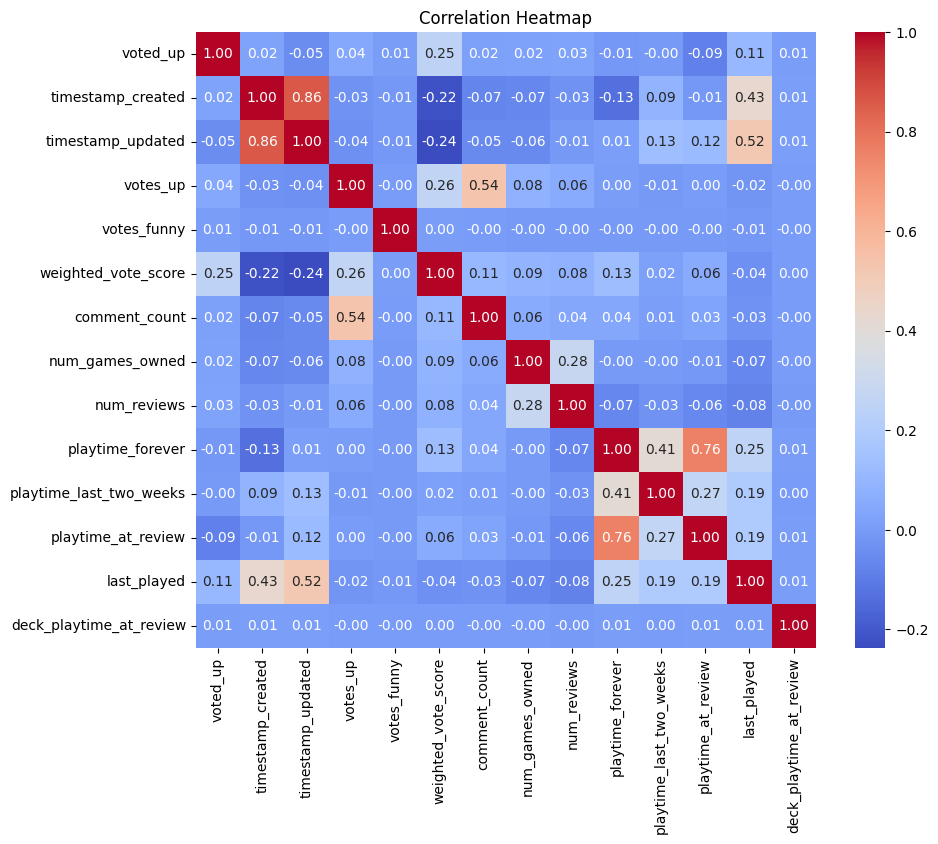


[Categorical Variables Correlation]
steam_purchase - Chi2: 1013.42, p-value: 0.0000
received_for_free - Chi2: 0.25, p-value: 0.6163
written_during_early_access - Chi2: 2612.32, p-value: 0.0000
primarily_steam_deck - Chi2: 2.77, p-value: 0.0960

[Binary Categorical Variables Pearson Correlation]
steam_purchase - Pearson Correlation with voted_up: 0.18
received_for_free - Pearson Correlation with voted_up: -0.00
written_during_early_access - Pearson Correlation with voted_up: 0.29
primarily_steam_deck - Pearson Correlation with voted_up: -0.01


In [ ]:
target_column = 'voted_up'

analyze_correlations(df, numeric_values, [i for i in categorical_values if i not in ['voted_up', 'recommendationid', 'steamid', 'review']], target_column)

### 해석

#### 1. **Numerical Variables Correlation**:
#### **양의 상관관계**
1. **`weighted_vote_score` (0.246)**:
   - `voted_up`과 가장 높은 양의 상관관계를 보임.
   - 리뷰의 가중 평균 점수가 높을수록 긍정 평가로 나타날 가능성이 높음.

2. **`last_played` (0.109)**:
   - 마지막으로 게임을 플레이한 시간이 `voted_up`과 약한 양의 상관관계를 보임.
   - 최근에 플레이한 사용자가 긍정적인 리뷰를 남길 가능성이 더 높음.

---

#### **음의 상관관계**
1. **`playtime_at_review` (-0.086)**:
   - 리뷰 작성 시점에서의 플레이 시간과 `voted_up` 간의 약간의 음의 상관관계가 있음.
   - 플레이 시간이 길수록 부정 평가일 가능성이 약간 더 높음.

---

### 3. **결론**
- 가장 높은 상관관계를 보이는 변수는 **`weighted_vote_score`**로, 가중치 점수가 높을수록 리뷰가 긍정적일 가능성이 높음을 알 수 있습니다.
- `last_played` 및 `votes_up`도 약간의 양의 상관관계를 보여, 이 변수들이 긍정 리뷰를 예측하는 데 유용할 수 있습니다.
- 반면, `playtime_at_review` 및 `timestamp_updated`는 약한 음의 상관관계를 보이며, 플레이 시간이 길거나 오래된 리뷰가 부정적일 가능성이 약간 더 높습니다.


---

#### 2. **Categorical Variables Correlation (Chi-Square Test)**:

1. **`steam_purchase`**:
   - **Chi2**: 1013.42, **p-value**: 0.0000
   - Steam 구매 여부와 리뷰의 긍정/부정(`voted_up`) 간에 강한 상관관계가 있습니다. 
   - 이는 Steam에서 직접 구매한 사용자가 리뷰에 긍정적인 영향을 줄 가능성이 있음을 나타냅니다.

2. **`written_during_early_access`**:
   - **Chi2**: 2612.32, **p-value**: 0.0000
   - 게임이 얼리 액세스(Early Access) 상태일 때 작성된 리뷰와 리뷰의 긍정/부정(`voted_up`) 간에는 매우 강한 상관관계가 있습니다.
   - 이는 얼리 액세스 기간 동안 작성된 리뷰가 긍정적이거나 부정적으로 강하게 치우칠 가능성을 시사합니다.

---

#### 2. **Binary Categorical Variables Pearson Correlation**:

1. **`steam_purchase`**:
   - **Pearson Correlation**: 0.18
   - Steam 구매 여부와 리뷰의 긍정/부정 간에 약한 양의 상관관계가 있습니다. Steam에서 직접 구매한 사용자는 긍정 리뷰를 남길 가능성이 조금 더 높습니다.

2. **`written_during_early_access`**:
   - **Pearson Correlation**: 0.29
   - 얼리 액세스 상태에서 작성된 리뷰와 리뷰의 긍정/부정 간에 약한 양의 상관관계가 있습니다.
   - 얼리 액세스 상태에서 작성된 리뷰가 긍정적일 가능성이 더 높음을 시사합니다.

---

### 결론 및 참고사항
- **유의미한 변수**: `steam_purchase`와 `written_during_early_access`는 `voted_up`과의 상관관계가 통계적으로 유의미하며, 특히 `written_during_early_access`는 더 높은 상관관계를 보입니다.
- **실제 적용**:
  - 모델 학습에서 `steam_purchase`와 `written_during_early_access`는 중요한 피처로 포함될 수 있습니다.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

def analyze_top_words(df):
    # 1. TF-IDF 기반 단어 분석
    vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df['review'].fillna(''))
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    tfidf_df['voted_up'] = df['voted_up'].values

    # 긍정/부정 리뷰별 상위 단어
    positive_words = tfidf_df[tfidf_df['voted_up'] == 1].drop('voted_up', axis=1).sum().sort_values(ascending=False).head(20)
    negative_words = tfidf_df[tfidf_df['voted_up'] == 0].drop('voted_up', axis=1).sum().sort_values(ascending=False).head(20)

    print("Top words in positive reviews:")
    print(positive_words)

    print("Top words in negative reviews:")
    print(negative_words)

    # 2. WordCloud 생성
    positive_text = ' '.join(df[df['voted_up'] == 1]['review'].dropna())
    negative_text = ' '.join(df[df['voted_up'] == 0]['review'].dropna())

    font_path = "C:/Users/USER/Downloads/Pretendard-1.3.9/public/static/Pretendard-Regular.otf"
    positive_wc = WordCloud(background_color='white', max_words=200, width=800, height=400, font_path=font_path).generate(positive_text)
    negative_wc = WordCloud(background_color='black', max_words=200, width=800, height=400, colormap='Reds', font_path=font_path).generate(negative_text)

    # WordCloud 시각화
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(positive_wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud - Positive Reviews')

    plt.subplot(1, 2, 2)
    plt.imshow(negative_wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud - Negative Reviews')

    plt.show()

Top words in positive reviews:
게임      551.832923
갓겜      332.744762
재밌음     299.852544
good    292.143979
너무      289.277812
재밌어요    211.004106
하면      200.917942
진짜      193.478167
같이      170.290767
정말      157.655374
재밌다     148.610164
친구랑     146.390258
개꿀잼     139.930486
게임을     138.460776
game    131.157298
게임이     130.415632
근데      129.298369
그냥      128.546114
있는      120.292594
하지만     119.665292
dtype: float64
Top words in negative reviews:
게임      650.870929
너무      333.071859
진짜      288.271325
그냥      278.886711
게임을     229.507095
망겜      204.884350
게임이     202.126216
game    194.871841
쓰레기     177.259457
살인마     167.977223
시발      164.274793
버그      145.896239
게임은     142.421834
내가      140.906863
존나      140.635877
서버      134.411356
아니      124.695300
이거      124.116302
ㅈ망겜     123.413889
매칭      122.646377
dtype: float64


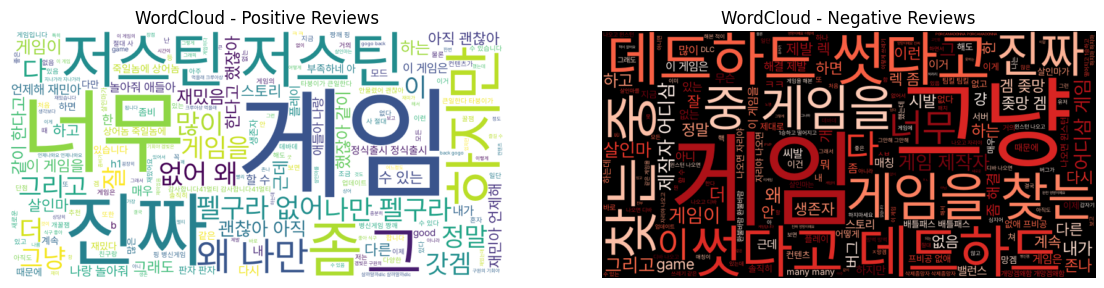

In [ ]:
analyze_top_words(df)